In [1]:
from pyfm import pylibfm
from sklearn.feature_extraction import DictVectorizer
import numpy as np
train = [
    {"user": "1", "item": "5", "age": 19},
    {"user": "2", "item": "43", "age": 33},
    {"user": "3", "item": "20", "age": 55},
    {"user": "4", "item": "10", "age": 20},
]
v = DictVectorizer()
X = v.fit_transform(train)
print(X.toarray())
y = np.repeat(1.0,X.shape[0])
fm = pylibfm.FM()
fm.fit(X,y)
fm.predict(v.transform({"user": "1", "item": "10", "age": 24}))

[[ 19.   0.   0.   0.   1.   1.   0.   0.   0.]
 [ 33.   0.   0.   1.   0.   0.   1.   0.   0.]
 [ 55.   0.   1.   0.   0.   0.   0.   1.   0.]
 [ 20.   1.   0.   0.   0.   0.   0.   0.   1.]]
Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training log loss: 0.26658


array([ 0.99180104])

In [2]:
y

array([ 1.,  1.,  1.,  1.])

In [3]:
from read_data import read_data, train_test, user_item_matrix
from sklearn.feature_extraction import DictVectorizer
from pyfm import pylibfm
from svd import Recommender, MostPopularRecommender, filter_new, convert_to_recsys_data, FMRecommender
import numpy as np
import seaborn as sns
from pandas.tseries.offsets import *
%matplotlib inline

/Users/kupa/.virtualenv/ds/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
train, test = train_test(read_data("../../input/"), test_size=DateOffset(months=1, days=15),  sales_end_offset=DateOffset(months=0, days=20))

Active sets: 47
Test size: 1411 Train size 5980


In [5]:
test = filter_new(train, test)
train = convert_to_recsys_data(train)
test = convert_to_recsys_data(test)

In [6]:
rec = FMRecommender(train, k=10)

In [8]:
acc = rec.evaluate(test)
print ("FM MSE %0.4f" % acc)

FM MSE 0.2885


0.0469754633497
1.0
7.55555555556
14.1111111111
20.6666666667
27.2222222222
33.7777777778
40.3333333333
46.8888888889
53.4444444444
60.0


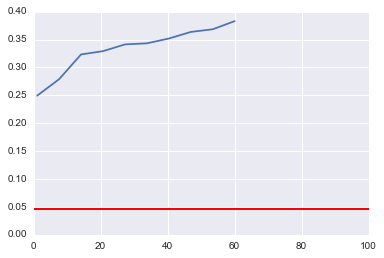

In [9]:
most_pop_rec = MostPopularRecommender(train)
most_pop_acc = most_pop_rec.evaluate(test)
print most_pop_acc

maps = []
ks = np.linspace(1, 60, 10)
for k in ks:
    print k
    rec = FMRecommender(train, k=k)
    maps.append(rec.evaluate(test))

sns.plt.plot([0, 100], [most_pop_acc, most_pop_acc], color='r', linestyle='-', linewidth=2)
sns.plt.plot(ks, maps)

Active sets: 20
Test size: 1235 Train size 4200
Active sets: 38
Test size: 1401 Train size 5481
Active sets: 47
Test size: 1411 Train size 5980
Active sets: 56
Test size: 1494 Train size 6663
Active sets: 63
Test size: 1494 Train size 6835
Active sets: 74
Test size: 1499 Train size 8772
Active sets: 82
Test size: 1499 Train size 9121
Active sets: 86
Test size: 1499 Train size 9240
Active sets: 104
Test size: 1503 Train size 10686
Active sets: 110
Test size: 1503 Train size 11232
Active sets: 112
Test size: 1503 Train size 11440
Active sets: 114
Test size: 1503 Train size 11541
Active sets: 133
Test size: 1503 Train size 17205
Active sets: 140
Test size: 1503 Train size 17935
Active sets: 147
Test size: 1503 Train size 18524


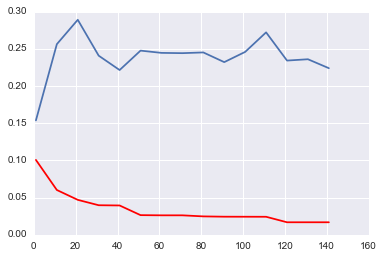

In [10]:
offsets = range(1, 150, 10)
svd_maps = []
pop_maps = []
for off in offsets:
    train, test = train_test(read_data("../../input/"), test_size=DateOffset(months=1, days=15),  sales_end_offset=DateOffset(months=0, days=off))
    test = filter_new(train, test)
    train = convert_to_recsys_data(train)
    test = convert_to_recsys_data(test)
    rec = FMRecommender(train, k=10)
    svd_maps.append(rec.evaluate(test))
    most_pop_rec = MostPopularRecommender(train)
    most_pop_acc = most_pop_rec.evaluate(test)
    pop_maps.append(most_pop_acc)
sns.plt.plot(offsets, svd_maps)
sns.plt.plot(offsets, pop_maps, color="r")
sns.plt.show()